In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from utils.metrics import distance_correlation, id_correlation
from utils.utils import cat
import seaborn as sns

In [2]:
np.random.seed(42)
torch.manual_seed(42)

N_points=1000

theta = torch.nn.functional.normalize(torch.as_tensor(np.random.uniform(-np.pi, np.pi, (N_points,2)), dtype=torch.float64))
X = theta[:,0].unsqueeze(1)
Z = theta[:,1].unsqueeze(1)
Y = torch.as_tensor(np.random.uniform(-1, 1, (N_points,1)), dtype=torch.float64)

In [3]:
print("Distance correlation between X and rest: ", distance_correlation(X, cat([Y, Z])))
print("Distance correlation between Y and rest: ", distance_correlation(Y, cat([X, Z])))
print("Distance correlation between Z and rest: ", distance_correlation(Z, cat([X, Y])))

Distance correlation between X and rest:  0.006219983729542246
Distance correlation between Y and rest:  0.0033181843278848756
Distance correlation between Z and rest:  0.00744309025097793


In [4]:
print("Id correlation between X and rest: ", id_correlation(X, cat([Y, Z]), return_pvalue=False))
print("Id correlation between Y and rest: ", id_correlation(Y, cat([X, Z]), return_pvalue=False))
print("Id correlation between Z and rest: ", id_correlation(Z, cat([X, Y]), return_pvalue=False))

Id correlation between X and rest:  {'corr': 0.48517459981738664, 'p': None, 'id': 2.0471676421852862, 'id1': 0.9502915712359374, 'id2': 2.130578775950597}
Id correlation between Y and rest:  {'corr': -0.13974080280002232, 'p': None, 'id': 2.047167642185243, 'id1': 0.942619083893285, 'id2': 0.9691225896084386}
Id correlation between Z and rest:  {'corr': 0.4538602899242512, 'p': None, 'id': 2.0471676421852494, 'id1': 0.9565038907694327, 'id2': 1.997041656730186}


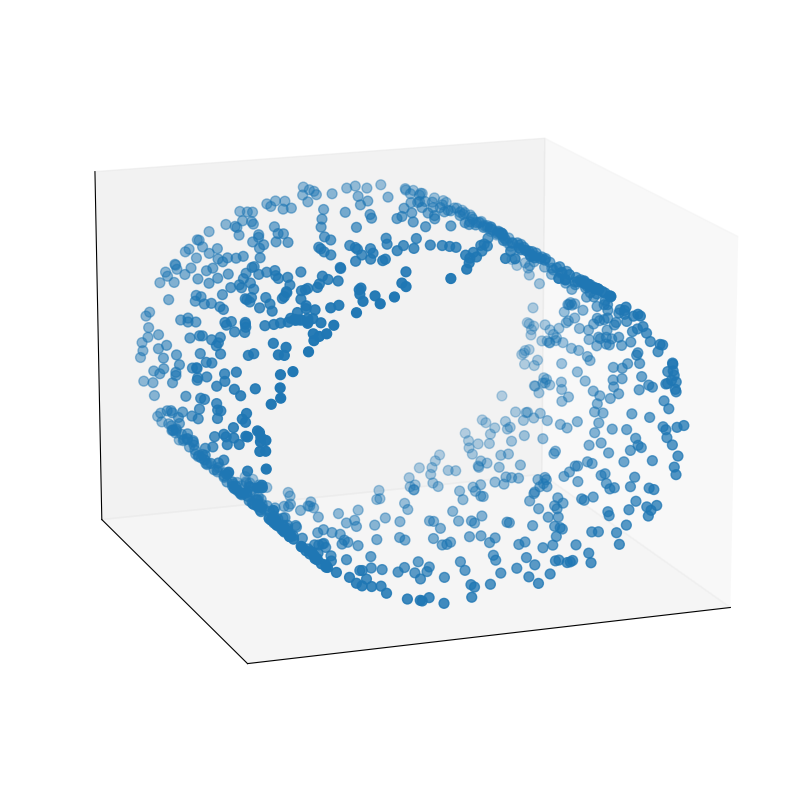

In [5]:
fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(111, projection='3d')
ax.view_init(15, -110)
ax.scatter(X, Y, Z, s=50)

ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
plt.savefig('results/cylinder.svg', dpi=200, bbox_inches='tight', format='svg')


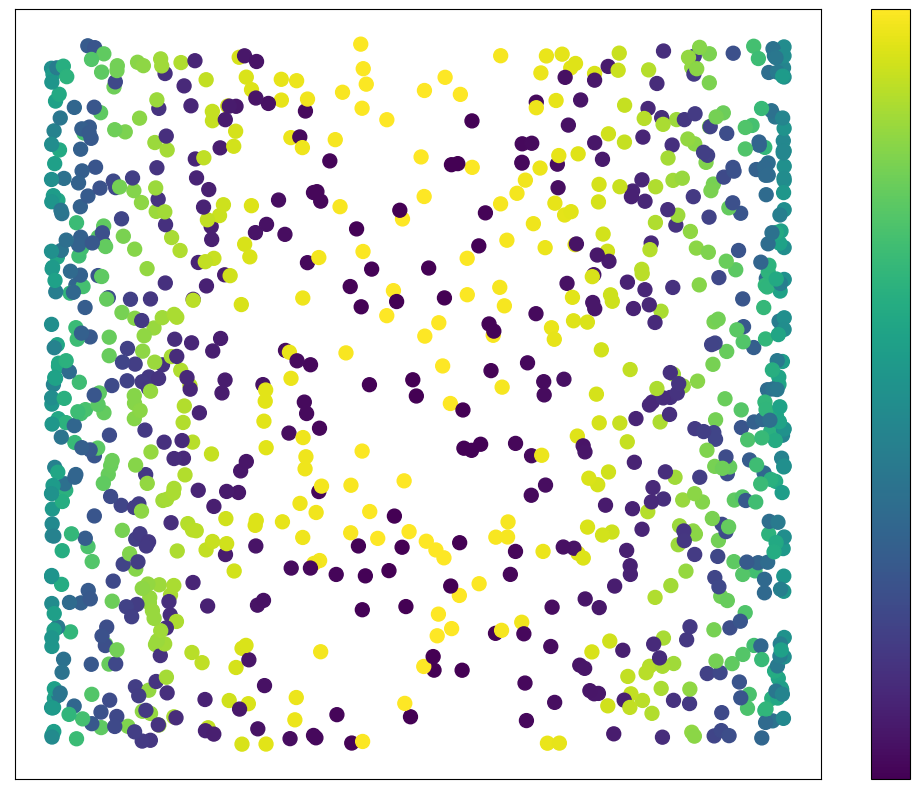

In [6]:
plt.figure(figsize=(13, 10))
plt.scatter(X, Y, s=100, c=Z, cmap='viridis')
plt.xticks([])
plt.yticks([])
plt.colorbar(ticks=[])
plt.savefig('results/cylinder_xy.svg', dpi=200, bbox_inches='tight', format='svg')


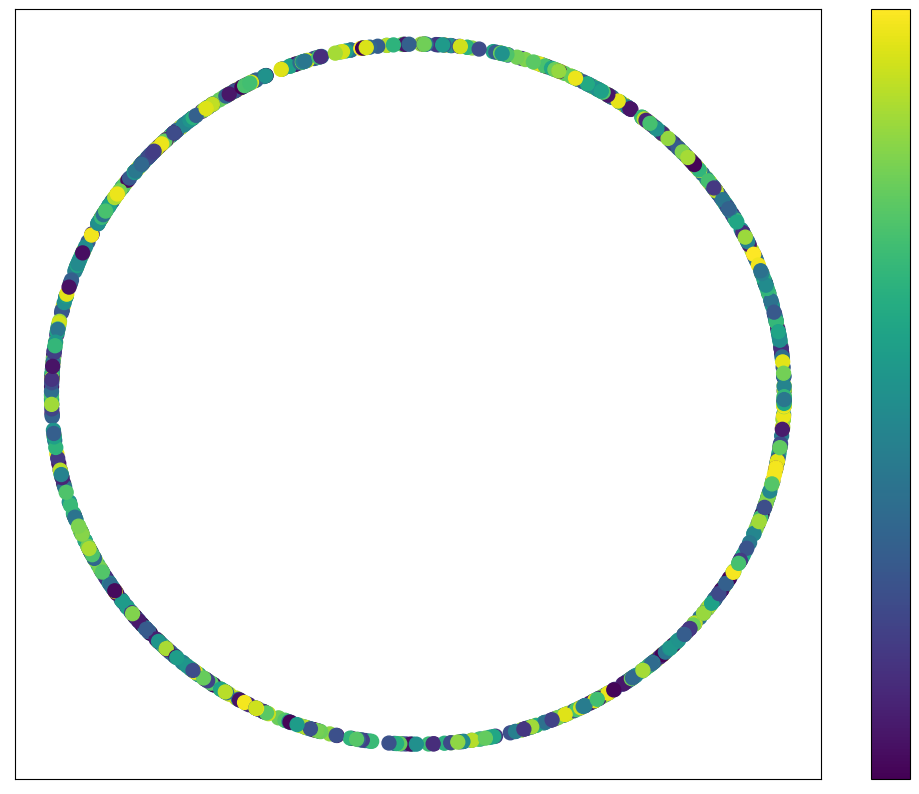

In [7]:
plt.figure(figsize=(13, 10))
plt.scatter(X, Z, s=100, c=Y, cmap='viridis')
plt.xticks([])
plt.yticks([])
plt.colorbar(ticks=[])
plt.savefig('results/cylinder_xz.svg', dpi=200, bbox_inches='tight', format='svg')
